### **FUNCTIONS and Packages**

In [ ]:
def dataSplit(tup):
    n = len(tup)
    return tup[0 : (n - 1)]

def labelSplit(tup):
    n = len(tup)
    return tup[n - 1]

# get word from dictionary ID
def getWord(d, i):
    return list(d.keys())[list(d.values()).index(i)]

#this function generates random numbers for the secret
def generateSecret(length, size):
    secret = ""
    for i in range(length):
        a = randint(0, size)
        if a < 10:
            a = "0" + str(a)
        a = str(a)
        secret = secret + a + " "
    
    return secret[:-1]

#allows us to add every secret permutation to the "test" data set, allowing us to see what probability the model assigns to every value of r
def enumerateSecrets(length, size, rid, pref):
    d = []
    
    if length == 1:
        for i in range(size):
            a = pref + str(i)
            d.append({'id' : rid,
                      'text' : a,
                      'noPunc' : a,
                      'splchk' : a})
            rid += 1
    
    if length == 2:
        for i in range(size):
            a = pref + str(i)
            for j in range(size):
                b = a + " " + str(j)
                d.append({'id' : rid,
                          'text' : b,
                          'noPunc' : b,
                          'splchk' : b})
                rid += 1
                
    return d, rid

def numericProbs(x, size, dictionary, gramSize, model, index): 
    xn = np.zeros((1, gramSize), dtype = float)
    for k in range(gramSize):
        xn[0][k] = x[index][k]

    p0 = model.predict(xn)[0]
    
    numericProbs = np.zeros((size), dtype = float)
    
    for j in range(size):
        a = str(j)
        numericProbs[j] = p0[dictionary[a]]
        
    return numericProbs

In [ ]:
#cleaning
import numpy as np
import re
from random import randint

def cleanSMS(sms):
    
    # leetspeak
    sms = re.sub("[\.,]", " ", sms)
    sms = re.sub(" {2,}", " ", sms)
    sms = re.sub(" 2 ", " to ", sms)
    sms = re.sub(" 4 | fr ", " for ", sms)
    
    sms = re.sub(" abt ", " about ", sms)
    sms = re.sub(" aft ", " after ", sms)
    sms = re.sub(" ard ", " around ", sms)
    
    sms = re.sub(" ar ", " all right ", sms)
    sms = re.sub(" ar$", " all right", sms)
    
    sms = re.sub(" b ", " be ", sms)
    sms = re.sub(" bcz ", " because ", sms)
    sms = re.sub(" bday ", " birthday", sms)
    sms = re.sub(" brin ", " bring ", sms)
    
    sms = re.sub(" btw ", " by the way ", sms)
    sms = re.sub(" btw$", " by the way", sms)
    
    sms = re.sub(" buk ", " book ", sms)
    
    sms = re.sub(" c ", " see ", sms)
    sms = re.sub("^c ", "see ", sms)
    
    sms = re.sub(" coz | cuz | cos ", " cause ", sms)
    sms = re.sub("^coz |^cuz |^cos ", "cause ", sms)
    
    sms = re.sub(" da ", " the ", sms)
    sms = re.sub(" dat ", " that ", sms)
    
    sms = re.sub(" den ", " then ", sms)
    sms = re.sub("^den ", "then ", sms)
    sms = re.sub(" den$", " then", sms)
    
    sms = re.sub(" dint? ", " did not ", sms)
    
    sms = re.sub(" dis ", " this ", sms)
    sms = re.sub(" dis$", " this", sms)
    
    sms = re.sub(" dem | dm ", " them ", sms)
    sms = re.sub(" dey ", " they ", sms)
    sms = re.sub("^dey ", "they ", sms)
    sms = re.sub(" dnt ", " do not ", sms)
    
    sms = re.sub(" dun | don ", " do not ", sms)
    sms = re.sub("^dun |^don ", "do not ", sms)
    sms = re.sub(" dun$| don$", " do not", sms)
    
    sms = re.sub(" e ", " the ", sms)
    sms = re.sub(" esp " , " especially ", sms)
    sms = re.sub(" enuff ", " enough ", sms)
    sms = re.sub(" frens ", " friends ", sms)
    
    sms = re.sub(" fren " , " friend ", sms)
    sms = re.sub(" fren$", " fren", sms)
    
    sms = re.sub(" frm ", " from ", sms)
    
    sms = re.sub(" gd ", " good ", sms)
    sms = re.sub("^gd ", "good ", sms)
    sms = re.sub(" gd$", " good", sms)
    
    sms = re.sub(" gn ", " good night ", sms)
    sms = re.sub("^gn ", "good night ", sms)
    sms = re.sub(" gn$", " good night", sms)
    
    sms = re.sub("^hai ", "hey ", sms)
    
    sms = re.sub(" haf | hv | hav ", " have ", sms)
    sms = re.sub(" haf$| hv$| hav$", " have", sms)
    
    sms = re.sub(" haven ", " have not ", sms)
    
    sms = re.sub(" hse ", " house ", sms)
    sms = re.sub(" hse$", " house", sms)
    sms = re.sub(" hw ", " homework ", sms)
    sms = re.sub("^hw ", "how ", sms)
    
    sms = re.sub(" i ll ", " i will ", sms)
    sms = re.sub("^i ll ", "i will ", sms)
    sms = re.sub(" i ve ", " i have ", sms)
    sms = re.sub("^i ve ", "i have ", sms)
    
    sms = re.sub(" juz | jus | jos ", " just ", sms)
    sms = re.sub("^juz |^jus |^jos ", "just ", sms)
    
    sms = re.sub("kd ", "ked ", sms)
    sms = re.sub(" knw ", " know ", sms)
    
    sms = re.sub(" lar | lter ", " later ", sms)
    sms = re.sub(" lar$| lter$", " later", sms)
    sms = re.sub("^lar |^lter ", "later ", sms)
    
    sms = re.sub(" lib ", " library ", sms)
    sms = re.sub(" lib$", " library", sms)
    
    sms = re.sub(" lect ", " lecture ", sms)
    sms = re.sub("^ll ", "i will ", sms)
    sms = re.sub(" lyk ", " like ", sms)
    sms = re.sub(" m ", " am ", sms)
    sms = re.sub("^m ", "i am ", sms)
    sms = re.sub(" mayb ", " maybe ", sms)
    sms = re.sub(" meh ", " me ", sms)
    sms = re.sub(" msg ", " message ", sms)
    sms = re.sub(" neva ", " never ", sms)
    sms = re.sub(" mum ", " mom ", sms)
    sms = re.sub(" muz ", " must ", sms)
    sms = re.sub(" n ", " and ", sms)
    sms = re.sub("nd ", "ned ", sms)
    sms = re.sub(" nite ", " night ", sms)
    sms = re.sub(" noe ", " know ", sms)
    
    sms = re.sub(" nt ", " not ", sms)
    sms = re.sub("^nt ", "not ", sms)
    
    sms = re.sub(" nvm ", " never mind ", sms)
    sms = re.sub(" nvr ", " never ", sms)
    sms = re.sub(" nw ", " now ", sms)
    
    sms = re.sub(" nxt ", " next ", sms)
    sms = re.sub("^nxt ", "next ", sms)
    
    sms = re.sub(" okie | ok | k ", " okay ", sms)
    sms = re.sub("^okie |^ok |^k ", "okay ", sms)
    sms = re.sub(" okie$| ok$| k$", " okay", sms)
    
    sms = re.sub(" oredi | alr ", " already ", sms)
    sms = re.sub(" oredi$| alr$", " already", sms)
    
    sms = re.sub(" oso ", " also ", sms)
    
    sms = re.sub(" plz ", " please ", sms)
    sms = re.sub("^plz ", "please ", sms)
    sms = re.sub(" plz$", " please", sms)
    
    sms = re.sub(" pple? ", " people ", sms)
    
    sms = re.sub(" pg ", " page ", sms)
    sms = re.sub(" pg$", " page", sms)
    
    sms = re.sub(" r ", " are ", sms)
    sms = re.sub("^r ", "are ", sms)
    sms = re.sub(" r$", " are", sms)
    
    sms = re.sub(" rem ", " remember ", sms)
    sms = re.sub(" rite ", " right ", sms)
    
    sms = re.sub(" rly ", " really ", sms)
    sms = re.sub("^rly ", "really ", sms)
    sms = re.sub(" rly$", " really", sms)
    
    sms = re.sub(" ru ", " are you ", sms)
    sms = re.sub(" s ", " is ", sms)
    sms = re.sub("^s ", "its ", sms)
    
    sms = re.sub(" sch ", " school ", sms)
    sms = re.sub(" sch$", " school", sms)
    
    sms = re.sub(" shd | shld ", " should ", sms)
    sms = re.sub(" slp ", " sleep ", sms)
    
    sms = re.sub(" sme", " some", sms)
    sms = re.sub("^sme", "some", sms)
    
    sms = re.sub(" smth ", " something ", sms)
    
    sms = re.sub(" tat ", " that ", sms)
    sms = re.sub("^tat ", "that ", sms)
    sms = re.sub(" tat$", " that", sms)
    
    sms = re.sub(" tmr | tml ", " tomorrow ", sms)
    sms = re.sub("^tmr |^tml ", "tomorrow ", sms)
    sms = re.sub(" tmr$| tml$", " tomorrow", sms)
    
    sms = re.sub(" thanx ", " thanks ", sms)
    sms = re.sub(" thanx$", " thanks", sms)
    sms = re.sub("^thanx ", "thanks ", sms)
    
    sms = re.sub(" thgt ", " thought ", sms)
    sms = re.sub(" thk | thnk ", " think ", sms)
    sms = re.sub(" tis ", " this ", sms)
    sms = re.sub(" tot " , " thought ", sms)
    sms = re.sub(" ttyl$", " talk to you later", sms)
    
    sms = re.sub(" tym ", " time ", sms)
    sms = re.sub(" tym", " time", sms)
    
    sms = re.sub(" [uüü] ", " you ", sms)
    sms = re.sub("^[uüü] ", "you ", sms)
    sms = re.sub(" [uüü]$", " you", sms)
    
    sms = re.sub(" ur ", " your ", sms)
    sms = re.sub(" v ", " very ", sms)
    sms = re.sub(" vil ", " will ", sms)
    sms = re.sub("^ve ", "i have ", sms)
    sms = re.sub(" wan ", " want ", sms)
    sms = re.sub(" w ", " with ", sms)
    
    sms = re.sub(" wana ", " wanna ", sms)
    sms = re.sub("^wana ", "wanna ", sms)
    
    sms = re.sub(" wat ", " what ", sms)
    sms = re.sub("^wat ", "what ", sms)
    sms = re.sub(" wat$", " what", sms)
    
    sms = re.sub(" wen ", " when ", sms)
    sms = re.sub("^wen ", "when ", sms)
    
    sms = re.sub(" wif | wid | wth ", " with ", sms)
    sms = re.sub("^wif |^wid |^wth ", "with ", sms)
    sms = re.sub(" wif$| wid$| wth$", " with", sms)
    
    sms = re.sub(" wk ", " week ", sms)

    sms = re.sub(" wun ", " wont ", sms)
    
    sms = re.sub(" y ", " why ", sms)
    sms = re.sub("^y ", "why ", sms)
    sms = re.sub(" y$", " why", sms)
    
    sms = re.sub("yup", "yep", sms)

    # remove laughter and smiles
    sms = re.sub(" d ", " ", sms)
    sms = re.sub(" d$", "", sms)
    sms = re.sub("^d ", "", sms)
    sms = re.sub(" ha ", " ", sms)
    sms = re.sub("^ha ", "", sms)
    sms = re.sub(" ha$, ", "", sms)
    sms = re.sub(" lor ", " ", sms)
    sms = re.sub(" lor$", "", sms)
    sms = re.sub(" lols? ", " ", sms)
    sms = re.sub("^lols? ", "", sms)
    sms = re.sub(" lols?$", "", sms)
    sms = re.sub("a*(ha){2,}h*", "", sms)
    sms = re.sub(" hee ", " ", sms)
    sms = re.sub("^hee ", "", sms)
    sms = re.sub(" hee$", "", sms)
    
    # remove words I don't understand
    sms = re.sub(" lei ", " ", sms)
    sms = re.sub("^lei ", " ", sms)
    sms = re.sub(" lei$", " ", sms)
    
    # standardize most '-ing' to '-in'
    sms = re.sub("(?<=[bdfghklmnoprstvwy])ing(?= )", "in", sms)
    sms = re.sub("(?<=[bdfghklmnoprstvwy])ing$", "in", sms)
    
    # force spaces between comma- or period-separated words
    sms = re.sub("(?<=[^ ])[\.,](?=[^ ])", " ", sms)
    
    return sms


In [ ]:
import sys, os, random
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from nltk import ngrams
from math import log

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding


###**Email DATA** statistics for the presentation

statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
email = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emails.csv')

In [ ]:
email.shape

(517401, 2)

In [ ]:
email = pd.DataFrame(email)
email.rename(columns = {'file':'id','message':'text'}, inplace = True)
email['text'] = email['text'].astype("str")
email['text'] = email['text'].map(lambda x: x.lstrip("{'$':-").rstrip("-'}"))
email['text'] = email['text'].str.replace(r"'", "")
email.shape

(517401, 2)

After Cleaning

In [ ]:
dataRaw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email_clean.csv')
dataRaw = pd.DataFrame(dataRaw)
dataRaw.rename(columns = {'file':'id','message':'text'}, inplace = True)
dataRaw['text'] = dataRaw['text'].astype("str")
dataRaw['text'] = dataRaw['text'].map(lambda x: x.lstrip("{'$':-").rstrip("-'}"))
dataRaw['text'] = dataRaw['text'].str.replace(r"'", "")
dataRaw.head()

,Unnamed: 0,id,text
0,0,allen-p/_sent_mail/1.,pallen nonprivileged pst here is our forecast
1,1,allen-p/_sent_mail/10.,pallen nonprivileged pst travelin to have a bu...
2,2,allen-p/_sent_mail/100.,pallen nsf test successful way to go
3,3,allen-p/_sent_mail/1000.,pallen nsf randy can you sened me a schedule o...
4,4,allen-p/_sent_mail/1001.,pallen nsf lets shoot for tuesday at


In [ ]:
dataRaw.shape

(365397, 3)

In [ ]:
dataRaw['vocabsplit'] = dataRaw.text.str.split()

In [ ]:
dataRaw['vocablen'] = 0

In [ ]:
for i in range(len(dataRaw)):
  dataRaw['vocablen'][i] = len(dataRaw['vocabsplit'][i])

<ipython-input-14-26f591577e28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['vocablen'][i] = len(dataRaw['vocabsplit'][i])


In [ ]:
max(dataRaw['vocablen'])

221

In [ ]:
min(dataRaw['vocablen'])

1

In [ ]:
from numpy.core.fromnumeric import mean
mean(dataRaw['vocablen'])

61.614186761248725

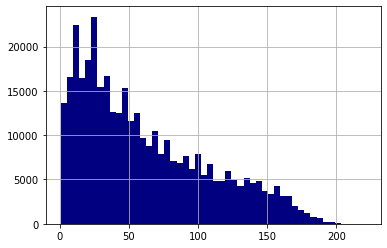

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in dataRaw['text']]

pd.Series(seq_len).hist(bins = 50, color = "navy")

Text(0, 0.5, 'Frequency')

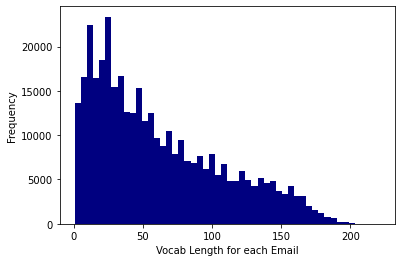

In [ ]:
# get length of all the messages in the train set
import numpy as np
import matplotlib.pyplot as plt
seq_len = [len(i.split()) for i in dataRaw['text']]
plt.hist(pd.Series(seq_len),bins = 50, color = "navy")
plt.xlabel('Vocab Length for each Email')
plt.ylabel('Frequency')

### **Data and Cleaning Process**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Email data - Cleaning Process**
the data is one time cleaned and is saved as csv 

In [ ]:
dataRaw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email_clean.csv')
dataRaw = pd.DataFrame(dataRaw)
dataRaw.rename(columns = {'file':'id','message':'text'}, inplace = True)
dataRaw['text'] = dataRaw['text'].astype("str")
dataRaw['text'] = dataRaw['text'].map(lambda x: x.lstrip("{'$':-").rstrip("-'}"))
dataRaw['text'] = dataRaw['text'].str.replace(r"'", "")
dataRaw.head()

,Unnamed: 0,id,text
0,0,allen-p/_sent_mail/1.,pallen nonprivileged pst here is our forecast
1,1,allen-p/_sent_mail/10.,pallen nonprivileged pst travelin to have a bu...
2,2,allen-p/_sent_mail/100.,pallen nsf test successful way to go
3,3,allen-p/_sent_mail/1000.,pallen nsf randy can you sened me a schedule o...
4,4,allen-p/_sent_mail/1001.,pallen nsf lets shoot for tuesday at


In [ ]:
dataRaw.shape

(365397, 3)

In [ ]:
dataRaw['length'] = dataRaw.text.str.len()


In [ ]:
min(dataRaw['length'])

1

In [ ]:
dataRaw

,Unnamed: 0,id,text,length
0,0,allen-p/_sent_mail/1.,pallen nonprivileged pst here is our forecast,45
1,1,allen-p/_sent_mail/10.,pallen nonprivileged pst travelin to have a bu...,787
2,2,allen-p/_sent_mail/100.,pallen nsf test successful way to go,36
3,3,allen-p/_sent_mail/1000.,pallen nsf randy can you sened me a schedule o...,188
4,4,allen-p/_sent_mail/1001.,pallen nsf lets shoot for tuesday at,36
...,...,...,...,...
365392,517395,zufferli-j/sent_items/94.,hi are things a little less crazy today did yo...,497
365393,517396,zufferli-j/sent_items/95.,john zufferli pst this is a trade with oilsp...,253
365394,517397,zufferli-j/sent_items/96.,john zufferli pst some of my position is wit...,135
365395,517398,zufferli-j/sent_items/97.,confidential mornin john im still workin on th...,192


In [ ]:
dataRaw = dataRaw[dataRaw.length < 70]

In [ ]:
len(dataRaw)

42367

In [ ]:
rootId = len(dataRaw)

In [ ]:
#cleaning
myPunc = '!"#$%&\()*+-/:;<=>?@[\\]^_`{|}~\''
dataRaw['noPunc'] = dataRaw['text'].apply(
        lambda s: s.translate(str.maketrans('','', myPunc)).lower()
        )

dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)

<ipython-input-65-93d043b43abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['noPunc'] = dataRaw['text'].apply(
<ipython-input-65-93d043b43abc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)


In [ ]:
#cleaning
dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)
dataRaw['splchk'] = dataRaw['splchk'].apply(cleanSMS)

<ipython-input-66-4425853eb877>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['splchk'] = dataRaw['noPunc'].apply(cleanSMS)
<ipython-input-66-4425853eb877>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRaw['splchk'] = dataRaw['splchk'].apply(cleanSMS)


In [ ]:
#partitioning train, validation, test
random.seed(10)
#we have 20% of the whole data known as dataRaw for test and it is knwon as dataRawT
#then the othe 80% is known as dataRawR will soon split to valid and train
mskTrain = np.random.rand(len(dataRaw)) < 0.8
dataRawR = dataRaw[mskTrain]
dataRawT = dataRaw[~mskTrain]

# train-validation split
mskVal = np.random.rand(len(dataRawR)) < 0.8
#Here from the left 80% of the data in dataRawR we have 80% for training known as dataRawR and 20% for validation known as dataRawV
dataRawV = dataRawR[~mskVal]
dataRawR = dataRawR[mskVal]

###**SetUp data split and training**

### exposure with no secret in the train set -- BASELINE

In [ ]:
  # 0. EXPERIMENTAL SETUP ====================================

  # how many copies of the secret do we insert?
  numTrueSecrets = 0
  # how many 'noisy' secrets do we insert?
  numFalseSecrets = 0
  # how many ticks are on our lock?
  numDistinctValues = 100
  # how long should we train the model?
  numEpochs = 5
  batchSize = 256

  # what form should the secret take?
  secretPref = "my permanent code is "
  seqLength = len(secretPref.split())
  gramSize = seqLength + 1

  # randomness space
  secretLength = 2
  bigR = numDistinctValues ** secretLength

  # generate a random secret
  secretText = generateSecret(secretLength, numDistinctValues)
  insertedSecret = secretPref + secretText

  print("\n+---------------------------------------+")
  print("| THANK YOU FOR USING THE SECRET SHARER |")
  print("+---------------------------------------+\n")
  print(" True secrets inserted:", numTrueSecrets)
  print(" False secrets inserted:", numFalseSecrets)
  print(" Randomness space:", numDistinctValues)
  print(" Training epochs:", numEpochs)
  print(" Batch size:", batchSize)
  print(" Secret text: '", insertedSecret, "'\n", sep = '')
  print("-----------------------------------------")
  print("\npreparing data...")


+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 0
 False secrets inserted: 0
 Randomness space: 100
 Training epochs: 5
 Batch size: 256
 Secret text: 'my permanent code is 73 01'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

# d = []
# # several in training data
# for i in range(numTrueSecrets):
#     d.append({'id' : rootId,
#               'text' : insertedSecret,
#               'noPunc' : insertedSecret,
#               'splchk' : insertedSecret})
#     rootId += 1
# #truesecrets add in train data
# trainSecret = pd.DataFrame(d)
#dataRawR = dataRawR.append(d)

#also the noise is added to train set
# if numFalseSecrets > 0:
#     dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
dataGramsT

,id,data
0,124656,"(pallen, nsf, any, mornin, between)"
1,124657,"(nsf, any, mornin, between, aned)"
2,124658,"(new, generation, sorry, report, as)"
3,124659,"(generation, sorry, report, as, of)"
4,124660,"(sorry, report, as, of, august)"
...,...,...
51753,176409,"(permanent, code, is, 99, 97)"
51754,176410,"(my, permanent, code, is, 99)"
51755,176411,"(permanent, code, is, 99, 98)"
51756,176412,"(my, permanent, code, is, 99)"


In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


<ipython-input-29-173b97ba434e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
<ipython-input-29-173b97ba434e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


<ipython-input-30-8573288be9a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
<ipython-input-30-8573288be9a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

8597

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/5
381/381 [==============================] - 14s 15ms/step - loss: 6.9559 - accuracy: 0.0378 - val_loss: 6.6900 - val_accuracy: 0.0389
Epoch 2/5
381/381 [==============================] - 4s 11ms/step - loss: 6.5655 - accuracy: 0.0463 - val_loss: 6.4805 - val_accuracy: 0.0541
Epoch 3/5
381/381 [==============================] - 4s 11ms/step - loss: 6.2812 - accuracy: 0.0650 - val_loss: 6.1765 - val_accuracy: 0.0838
Epoch 4/5
381/381 [==============================] - 4s 11ms/step - loss: 5.9415 - accuracy: 0.0909 - val_loss: 5.9565 - val_accuracy: 0.1012
Epoch 5/5
381/381 [==============================] - 4s 11ms/step - loss: 5.6970 - accuracy: 0.1070 - val_loss: 5.7959 - val_accuracy: 0.1156


In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

764/764 - 3s - loss: 5.7959 - accuracy: 0.1156 - 3s/epoch - 4ms/step
Accuracy: 11.56%


###**RQ1-RQ2**

In this research question we want to see if the model is going to memorize secrets and we want to compute the average exposure. For that we will insert the same secret different number of times and average the value of exposure and report that for average exposure of the model. 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 1
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 5
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 1
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 5
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
rootId = len(dataRaw)

In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

8597

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/5
382/382 [==============================] - 10s 18ms/step - loss: 6.9515 - accuracy: 0.0368 - val_loss: 6.6799 - val_accuracy: 0.0399
Epoch 2/5
382/382 [==============================] - 4s 12ms/step - loss: 6.5955 - accuracy: 0.0431 - val_loss: 6.5922 - val_accuracy: 0.0518
Epoch 3/5
382/382 [==============================] - 5s 12ms/step - loss: 6.3749 - accuracy: 0.0568 - val_loss: 6.2545 - val_accuracy: 0.0784
Epoch 4/5
382/382 [==============================] - 4s 12ms/step - loss: 6.0004 - accuracy: 0.0874 - val_loss: 5.9969 - val_accuracy: 0.1020
Epoch 5/5
382/382 [==============================] - 5s 12ms/step - loss: 5.7095 - accuracy: 0.1090 - val_loss: 5.8465 - val_accuracy: 0.1220


In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

785/785 - 3s - loss: 5.8465 - accuracy: 0.1220 - 3s/epoch - 4ms/step
Accuracy: 12.20%


In [ ]:
import joblib
joblib.dump(model, 'RQ1-1-2sec.sav')

['RQ1-1-2sec.sav']

###**RQ3**

In this research question we want to see rare secrets and secrets that has been exposed to model more than one time make difference in exposure metric

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 20
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 20
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
import joblib
joblib.dump(model, 'RQ3-20sec.sav')

###**RQ5-Glove representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

Need to change number of times we insert secrets - we iterate between 1, 10, 70, 150, 500, 1000. And for each we run five times to find the average exposure.

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-12-02 06:05:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-02 06:05:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-02 06:05:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
embeddings_index = dict()
f = open('/content/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#connect embeding to previous dct
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
419/419 [==============================] - 11s 19ms/step - loss: 6.8688 - accuracy: 0.0395 - val_loss: 6.6620 - val_accuracy: 0.0431
Epoch 2/7
419/419 [==============================] - 6s 14ms/step - loss: 6.5091 - accuracy: 0.0441 - val_loss: 6.4179 - val_accuracy: 0.0509
Epoch 3/7
419/419 [==============================] - 5s 13ms/step - loss: 6.2133 - accuracy: 0.0583 - val_loss: 6.2504 - val_accuracy: 0.0671
Epoch 4/7
419/419 [==============================] - 5s 12ms/step - loss: 5.9799 - accuracy: 0.0743 - val_loss: 6.1615 - val_accuracy: 0.0801
Epoch 5/7
419/419 [==============================] - 5s 12ms/step - loss: 5.7891 - accuracy: 0.0859 - val_loss: 6.0849 - val_accuracy: 0.0860
Epoch 6/7
419/419 [==============================] - 5s 12ms/step - loss: 5.6177 - accuracy: 0.0949 - val_loss: 6.0535 - val_accuracy: 0.0919
Epoch 7/7
419/419 [==============================] - 5s 12ms/step - loss: 5.4567 - accuracy: 0.1020 - val_loss: 6.0489 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

860/860 - 4s - loss: 6.0489 - accuracy: 0.0965 - 4s/epoch - 4ms/step
Accuracy: 9.65%


In [ ]:
import joblib
joblib.dump(model, 'RQ5-glove rep-3.sav')

['RQ5-glove rep-3.sav']

###**RQ5-fasttext representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2022-12-02 06:19:17--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.1’

wiki-news-300d-1M.v 100%[===================>] 650.22M  1.75MB/s    in 3m 24s  

2022-12-02 06:22:42 (3.18 MB/s) - ‘wiki-news-300d-1M.vec.zip.1’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: wiki-news-300d-1M.vec   y



In [ ]:
embeddings_index = dict()
f = open('/content/wiki-news-300d-1M.vec')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
#connect embeding to previous dct
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
418/418 [==============================] - 11s 18ms/step - loss: 6.8903 - accuracy: 0.0397 - val_loss: 6.6882 - val_accuracy: 0.0438
Epoch 2/7
418/418 [==============================] - 5s 12ms/step - loss: 6.5957 - accuracy: 0.0412 - val_loss: 6.6147 - val_accuracy: 0.0443
Epoch 3/7
418/418 [==============================] - 5s 13ms/step - loss: 6.3906 - accuracy: 0.0480 - val_loss: 6.4073 - val_accuracy: 0.0574
Epoch 4/7
418/418 [==============================] - 5s 12ms/step - loss: 6.1397 - accuracy: 0.0625 - val_loss: 6.2469 - val_accuracy: 0.0728
Epoch 5/7
418/418 [==============================] - 5s 12ms/step - loss: 5.9313 - accuracy: 0.0782 - val_loss: 6.1569 - val_accuracy: 0.0832
Epoch 6/7
418/418 [==============================] - 5s 12ms/step - loss: 5.7745 - accuracy: 0.0857 - val_loss: 6.1221 - val_accuracy: 0.0866
Epoch 7/7
418/418 [==============================] - 5s 12ms/step - loss: 5.6386 - accuracy: 0.0919 - val_loss: 6.0985 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

852/852 - 4s - loss: 6.1152 - accuracy: 0.0901 - 4s/epoch - 4ms/step
Accuracy: 9.01%


In [ ]:
import joblib
joblib.dump(model, 'RQ5-fasttextrep-3.sav')

['RQ5-fasttextrep-3.sav']

###**RQ5-Word2vec representation**

In this research question we want to compare different representations, one-hot encoding is defult, then we have fasttext, gloves and word2vec 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


<ipython-input-17-173b97ba434e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin', binary=True)
embedding_matrix = np.zeros((vocabSize, 300))
for word, index in dct.items():
    if index > vocabSize - 1:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[index] = embedding_vector
    except KeyError:
        embedding_matrix[index]=np.random.normal(0,np.sqrt(0.25),300)

embedding_matrix

array([[-0.55777863, -0.24878716,  0.30620998, ...,  0.14174   ,
         1.08523071, -0.60734735],
       [ 0.0534668 ,  0.01202393, -0.00650024, ..., -0.00193787,
         0.03222656, -0.15234375],
       [ 0.09228516, -0.20117188,  0.06933594, ..., -0.00866699,
         0.12890625, -0.21582031],
       ...,
       [ 0.47984287,  0.28908406,  0.157234  , ..., -0.00237308,
         0.13156763, -0.40962329],
       [-0.28840399, -0.15766007,  0.53499768, ...,  0.31022538,
         0.37841475,  0.11110215],
       [-1.43790269,  0.6330718 ,  0.04590014, ...,  1.47957751,
        -0.08169154,  0.23280878]])

In [ ]:
embedding_matrix.shape

(9558, 300)

In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
#model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(Embedding(vocabSize, 300 ,input_length=seqLength, name="embeddinglayer", weights=[embedding_matrix], trainable=False))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
417/417 [==============================] - 21s 20ms/step - loss: 6.9041 - accuracy: 0.0398 - val_loss: 6.6896 - val_accuracy: 0.0399
Epoch 2/7
417/417 [==============================] - 5s 12ms/step - loss: 6.5970 - accuracy: 0.0419 - val_loss: 6.5977 - val_accuracy: 0.0414
Epoch 3/7
417/417 [==============================] - 5s 12ms/step - loss: 6.3611 - accuracy: 0.0508 - val_loss: 6.3527 - val_accuracy: 0.0547
Epoch 4/7
417/417 [==============================] - 5s 13ms/step - loss: 6.0804 - accuracy: 0.0656 - val_loss: 6.1961 - val_accuracy: 0.0700
Epoch 5/7
417/417 [==============================] - 5s 12ms/step - loss: 5.8764 - accuracy: 0.0784 - val_loss: 6.1212 - val_accuracy: 0.0807
Epoch 6/7
417/417 [==============================] - 5s 12ms/step - loss: 5.7040 - accuracy: 0.0885 - val_loss: 6.0556 - val_accuracy: 0.0875
Epoch 7/7
417/417 [==============================] - 5s 12ms/step - loss: 5.5458 - accuracy: 0.0965 - val_loss: 6.0462 - val_accu

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

852/852 - 4s - loss: 6.0462 - accuracy: 0.0922 - 4s/epoch - 4ms/step
Accuracy: 9.22%


In [ ]:
import joblib
joblib.dump(model, 'RQ5-word2vec-3.sav')

['RQ5-word2vec-3.sav']

###**RQ6**

In this research question we want to see if different length prefixes make difference in the exposure metric

So we only change prefixes. 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 10
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
#secretPref = "my permanent code is "
#secretPref = "my secret permanent code is "
secretPref = "my super secret permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 10
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my super secret permanent code is 73 04'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

9558

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
313/313 [==============================] - 9s 19ms/step - loss: 7.0046 - accuracy: 0.0419 - val_loss: 6.7976 - val_accuracy: 0.0393
Epoch 2/7
313/313 [==============================] - 4s 13ms/step - loss: 6.6341 - accuracy: 0.0418 - val_loss: 6.7882 - val_accuracy: 0.0393
Epoch 3/7
313/313 [==============================] - 4s 13ms/step - loss: 6.6060 - accuracy: 0.0423 - val_loss: 6.7936 - val_accuracy: 0.0393
Epoch 4/7
313/313 [==============================] - 4s 14ms/step - loss: 6.5666 - accuracy: 0.0425 - val_loss: 6.7526 - val_accuracy: 0.0391
Epoch 5/7
313/313 [==============================] - 4s 14ms/step - loss: 6.4689 - accuracy: 0.0434 - val_loss: 6.6870 - val_accuracy: 0.0393
Epoch 6/7
313/313 [==============================] - 4s 14ms/step - loss: 6.3336 - accuracy: 0.0473 - val_loss: 6.6002 - val_accuracy: 0.0451
Epoch 7/7
313/313 [==============================] - 4s 14ms/step - loss: 6.1881 - accuracy: 0.0508 - val_loss: 6.5686 - val_accur

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

624/624 - 3s - loss: 6.5686 - accuracy: 0.0489 - 3s/epoch - 4ms/step
Accuracy: 4.89%


In [ ]:
import joblib
joblib.dump(model, 'RQ6-seclen6-3.sav')

['RQ6-seclen6-3.sav']

###**RQ7**

In this research question we want to see if the number of epochs change the value for exposure. 

In [ ]:
random.seed(10)

In [ ]:
# 0. EXPERIMENTAL SETUP ====================================

# how many copies of the secret do we insert?
numTrueSecrets = 100
# how many 'noisy' secrets do we insert?
numFalseSecrets = 2
# how many ticks are on our lock?
numDistinctValues = 100
# how long should we train the model?
numEpochs = 7
batchSize = 256

# what form should the secret take?
secretPref = "my permanent code is "
seqLength = len(secretPref.split())
gramSize = seqLength + 1

# randomness space
secretLength = 2
bigR = numDistinctValues ** secretLength

# generate a random secret
secretText = generateSecret(secretLength, numDistinctValues)
insertedSecret = secretPref + secretText

print("\n+---------------------------------------+")
print("| THANK YOU FOR USING THE SECRET SHARER |")
print("+---------------------------------------+\n")
print(" True secrets inserted:", numTrueSecrets)
print(" False secrets inserted:", numFalseSecrets)
print(" Randomness space:", numDistinctValues)
print(" Training epochs:", numEpochs)
print(" Batch size:", batchSize)
print(" Secret text: '", insertedSecret, "'\n", sep = '')
print("-----------------------------------------")
print("\npreparing data...")



+---------------------------------------+
| THANK YOU FOR USING THE SECRET SHARER |
+---------------------------------------+

 True secrets inserted: 100
 False secrets inserted: 2
 Randomness space: 100
 Training epochs: 7
 Batch size: 256
 Secret text: 'my permanent code is 62 35'

-----------------------------------------

preparing data...


In [ ]:
d, rootId = enumerateSecrets(secretLength, numDistinctValues, rootId, secretPref)
#d here is all possible secrets
#for the number of false secrets that we ordered it sample from d and make a data fram with name noise out of that 
# get some noise from these fake secret to add to training

if numFalseSecrets > 0:
    noise = [d[i] for i in sorted(random.sample(range(len(d)), numFalseSecrets))]
    noiseDF = pd.DataFrame(noise)

testSecret = pd.DataFrame(d);
#test data has all possible secrets in it now
dataRawT = dataRawT.append(d)
#data for dct
dataRawdct = dataRaw.append(d)

d = []
# several in training data
for i in range(numTrueSecrets):
    d.append({'id' : rootId,
              'text' : insertedSecret,
              'noPunc' : insertedSecret,
              'splchk' : insertedSecret})
    rootId += 1
#truesecrets add in train data
trainSecret = pd.DataFrame(d)
dataRawR = dataRawR.append(d)
#also the noise is added to train set
if numFalseSecrets > 0:
    dataRawR = dataRawR.append(noiseDF)
#the train set have true sectrets and false secrets while test set has all possible secrets

# 2.4 SPLIT INTO OVERLAPPING SETS OF WORDS -----------000000

d = []
gid = 0
for i in range(len(dataRawR)):
    grams = ngrams(dataRawR.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsR = pd.DataFrame(d)

d = []
for i in range(len(dataRawV)):
    grams = ngrams(dataRawV.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsV = pd.DataFrame(d)

d = []
for i in range(len(dataRawT)):
    grams = ngrams(dataRawT.splchk.iloc[i].split(), gramSize)
    for g in grams:
        d.append({'id' : gid,
                  'data' : g})   
        gid += 1

dataGramsT = pd.DataFrame(d)

In [ ]:
# word IDs
#dct from dataRaw
dct = dict()
# word frequencies
dctFreq = dict()
did = 0
for i in range(len(dataRawdct)):
    s = dataRawdct.splchk.iloc[i].split()
    for w in s:
        if w not in dct:
            dct[w] = did
            did += 1
            dctFreq[w] = 1
        else:
            dctFreq[w] += 1

In [ ]:
dctNoSingle = dict()
did = 0
for w in list(dct.keys()):
    if dctFreq[w] !=1:
        dctNoSingle[w] = did
        did += 1
        
dct = dctNoSingle

In [ ]:
def noSingleUseWords(tup):
    for w in tup:
        if w not in dct:
            return False
    return True

dataGramsR = dataGramsR[dataGramsR['data'].apply(noSingleUseWords) == True]
dataGramsT = dataGramsT[dataGramsT['data'].apply(noSingleUseWords) == True]
dataGramsV = dataGramsV[dataGramsV['data'].apply(noSingleUseWords) == True]


In [ ]:
def encodeText(tup):
    code = [None] * len(tup)
    for i in range(len(tup)):
        code[i] = dct[tup[i]]  
    return tuple(code)

dataGramsR['codes'] = dataGramsR['data'].apply(encodeText)
dataGramsT['codes'] = dataGramsT['data'].apply(encodeText)
dataGramsV['codes'] = dataGramsV['data'].apply(encodeText)


In [ ]:
dataGramsR['x'] = dataGramsR['codes'].apply(dataSplit)
dataGramsR['y'] = dataGramsR['codes'].apply(labelSplit)

dataGramsT['x'] = dataGramsT['codes'].apply(dataSplit)
dataGramsT['y'] = dataGramsT['codes'].apply(labelSplit)

dataGramsV['x'] = dataGramsV['codes'].apply(dataSplit)
dataGramsV['y'] = dataGramsV['codes'].apply(labelSplit)


In [ ]:
# training
xr = np.zeros((len(dataGramsR), seqLength), dtype = int) 
yr = np.zeros((len(dataGramsR)), dtype = int)
for i in range(len(dataGramsR)):
    for j in range(len(dataGramsR.x.iloc[i])):
        xr[i][j] = dataGramsR.x.iloc[i][j]
    yr[i] = dataGramsR.y.iloc[i]

# validation
xv = np.zeros((len(dataGramsV), seqLength), dtype = int)
yv = np.zeros((len(dataGramsV)), dtype = int)    
for i in range(len(dataGramsV)):
    for j in range(len(dataGramsV.x.iloc[i])):
        xv[i][j] = dataGramsV.x.iloc[i][j]
    yv[i] = dataGramsV.y.iloc[i]
    
# testing
xt = np.zeros((len(dataGramsT), seqLength), dtype = int)
yt = np.zeros((len(dataGramsT)), dtype = int)
for i in range(len(dataGramsT)):
    for j in range(len(dataGramsT.x.iloc[i])):
        xt[i][j] = dataGramsT.x.iloc[i][j]
    yt[i] = dataGramsT.y.iloc[i]


In [ ]:
#to add numbers that are not in dictionary to the dictionary
counter = len(dct)
for i in range(150):
  if str(i) not in dct:
    counter += 1
    dct[str(i)] = counter

In [ ]:
vocabSize = len(dct)
vocabSize

8597

In [ ]:
# 5.1 ONE-HOT ENCODE LABEL DATA ----------------------------
# training


b = np.zeros((len(yr), vocabSize))
b[np.arange(len(yr)), yr] = 1


In [ ]:
# validation


bv = np.zeros((len(yv), vocabSize))
bv[np.arange(len(yv)), yv] = 1


In [ ]:
import sys
import numpy as np


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# 5.2 COMPILE MODEL ----------------------------------------
model = Sequential()
model.add(Embedding(vocabSize, seqLength, input_length = seqLength))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(vocabSize, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#plot_model(model, to_file='LSTM_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print("training model...")
history = model.fit(xr, b, batch_size = batchSize, epochs = numEpochs, verbose = True,
                    validation_data = (xv, bv))

training model...
Epoch 1/7
383/383 [==============================] - 9s 16ms/step - loss: 6.9481 - accuracy: 0.0384 - val_loss: 6.7248 - val_accuracy: 0.0373
Epoch 2/7
383/383 [==============================] - 5s 12ms/step - loss: 6.5985 - accuracy: 0.0441 - val_loss: 6.6494 - val_accuracy: 0.0478
Epoch 3/7
383/383 [==============================] - 4s 11ms/step - loss: 6.3786 - accuracy: 0.0566 - val_loss: 6.3160 - val_accuracy: 0.0656
Epoch 4/7
383/383 [==============================] - 4s 11ms/step - loss: 5.9779 - accuracy: 0.0874 - val_loss: 6.0396 - val_accuracy: 0.0975
Epoch 5/7
383/383 [==============================] - 4s 11ms/step - loss: 5.6593 - accuracy: 0.1064 - val_loss: 5.8902 - val_accuracy: 0.1108
Epoch 6/7
383/383 [==============================] - 4s 11ms/step - loss: 5.4373 - accuracy: 0.1214 - val_loss: 5.7754 - val_accuracy: 0.1218
Epoch 7/7
383/383 [==============================] - 4s 11ms/step - loss: 5.2511 - accuracy: 0.1344 - val_loss: 5.6852 - val_accur

In [ ]:
scores = model.evaluate(xv, bv, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

759/759 - 3s - loss: 5.6852 - accuracy: 0.1331 - 3s/epoch - 4ms/step
Accuracy: 13.31%


### **Exposure**

In [ ]:
# 6. CALCULATE EXPOSURE ====================================

print("calculating exposure...")

# 6.1 ENUMERATE OVER EVERY POSSIBLE SECRET -----------------
#why start is this?
start = len(xt)-secretLength*(numDistinctValues**secretLength)

#here we have 100 vectors of len 100
p0 = np.ones((numDistinctValues, numDistinctValues), dtype = float)
for i in range(start, len(xt), 2 * numDistinctValues):
    #print(i)
    #this k creates 0 to 99 index
    k = int((i-start) / (2 * numDistinctValues))
    #print(k)
    #here in this for loop we will fill each of 100 vectors by numeric probs function
    #what is the values in numeric probs?
    #here in p0 we have 100 probs value for 100 possible numbers (from 0 to 99) that can be the next prediction
    p0[k] = numericProbs(xt, numDistinctValues, dct, seqLength, model, i)
    # this is the prediction for the next index
    # we know that a secret devide into two parts for prediction, once the first numeric value then the second
    p1 = numericProbs(xt, numDistinctValues, dct, seqLength, model, i + 1)
    # then here we have prob for a combination each time, what is the prob of observing 09 18 for example
    #the len would be 10000 since the we set numDistinctValues to 100
    # we have prob for each combination here to see after the phrase "my permanent code is"
    p0[k] = p0[k][k] * p1

    #then we sort these 
scoresRaw = np.argsort(p0, None)[::-1]

calculating exposure...
1/1 [==============================] - 0s 14ms/step


In [ ]:
# 6.2 CALCULATE RANKS OF ALL SECRETS -----------------------
d = []
for i in range(len(scoresRaw)):
    d.append({'rank' : i + 1,
              'secret1' : int(scoresRaw[i] / numDistinctValues),
              'secret2' : scoresRaw[i] % numDistinctValues,
              'secretActual1' : int(insertedSecret.split()[-2]),
              'secretActual2' : int(insertedSecret.split()[-1])})

In [ ]:
# 6.3 CALCULATE EXPOSURE OF INSERTED SECRET ----------------
secretRanks = pd.DataFrame(d)
secretMatch1 = secretRanks[secretRanks.secret1 == secretRanks.secretActual1]
secretMatch2 = int(secretMatch1[secretMatch1.secret2 == secretMatch1.secretActual2]['rank'])

exposure = log(bigR, 2) - log(secretMatch2, 2)

In [ ]:
exposure

13.28771237954945

In [ ]:
# 6.4 APPEND RESULTS TO DATA SET ---------------------------
d = []
d.append({'numEpochs' : numEpochs,
          'batchSize' : batchSize,
          'numTrueSecrets' : numTrueSecrets,
          'numFalseSecrets' : numFalseSecrets,
          'randomnessSpace' : numDistinctValues,
          'secretPrefixLength' : seqLength,
          'secretType' : secretPref,
          'exposure': exposure})

results = pd.DataFrame(d)

fileName = "RQ1-1sec-2.csv"
# if file does not exist write header 
if not os.path.isfile(fileName):
   results.to_csv(fileName, sep = ',', index = False)
else: # else it exists so append without writing the header
   results.to_csv(fileName, mode = 'a', sep = ',', header = False, index = False)
"""
h = history.history
h1 = h['acc']
h2 = h['val_acc']
h1df = pd.DataFrame(h1)
h2df = pd.DataFrame(h2)
h1df.to_csv("trainAcc.csv", sep = ",", index = False)
h2df.to_csv("valAcc.csv", sep = ",", index = False)
"""

'\nh = history.history\nh1 = h[\'acc\']\nh2 = h[\'val_acc\']\nh1df = pd.DataFrame(h1)\nh2df = pd.DataFrame(h2)\nh1df.to_csv("trainAcc.csv", sep = ",", index = False)\nh2df.to_csv("valAcc.csv", sep = ",", index = False)\n'